In [1]:
from config import Configuration
import pandas as pd
import numpy as np
from util import cvt_coord_to_diagonal, intersection_over_union, cvt_coord_to_mid_point
import matplotlib.pyplot as plt
from k_means import KMeans
from mini_batch_kmeans import MiniBatchKMeans

In [2]:
#Generate CSV files for PASCAL voc data set
#!python script_csv_gen_bndbox.py data/pascal_voc/train data/pascal_voc/test train_pascal.csv test_pascal.csv

In [50]:
pascal_train_data = pd.read_csv('annotation_data/train_pascal_voc.csv')
pascal_train_data.head(10)

,image_path,label,xmin,ymin,xmax,ymax,xc,yc,w,h
0,.\data\pascal_voc\train\000005.jpg,chair,0.526,0.562667,0.648,0.904000,0.587,0.733333,0.122,0.341333
1,.\data\pascal_voc\train\000005.jpg,chair,0.330,0.704000,0.506,0.992000,0.418,0.848000,0.176,0.288000
2,.\data\pascal_voc\train\000005.jpg,chair,0.010,0.650667,0.134,0.997333,0.072,0.824000,0.124,0.346667
3,.\data\pascal_voc\train\000005.jpg,chair,0.482,0.517333,0.590,0.797333,0.536,0.657333,0.108,0.280000
4,.\data\pascal_voc\train\000005.jpg,chair,0.554,0.496000,0.624,0.586667,0.589,0.541333,0.070,0.090667
5,.\data\pascal_voc\train\000007.jpg,car,0.282,0.150150,1.000,0.990991,0.641,0.570571,0.718,0.840841
6,.\data\pascal_voc\train\000009.jpg,horse,0.138,0.458667,0.540,0.880000,0.339,0.669333,0.402,0.421333
7,.\data\pascal_voc\train\000009.jpg,person,0.300,0.376000,0.458,0.757333,0.379,0.566667,0.158,0.381333
8,.\data\pascal_voc\train\000009.jpg,person,0.570,0.536000,0.654,0.882667,0.612,0.709333,0.084,0.346667
9,.\data\pascal_voc\train\000009.jpg,person,0.516,0.528000,0.594,0.877333,0.555,0.702667,0.078,0.349333


In [51]:
pascal_test_data = pd.read_csv('annotation_data/test_pascal_voc.csv')
pascal_test_data.head(10)

,image_path,label,xmin,ymin,xmax,ymax,xc,yc,w,h
0,.\data\pascal_voc\train\000001.jpg,dog,0.135977,0.480000,0.552408,0.742000,0.344193,0.611000,0.416431,0.262000
1,.\data\pascal_voc\train\000001.jpg,person,0.022663,0.024000,0.997167,0.996000,0.509915,0.510000,0.974504,0.972000
2,.\data\pascal_voc\train\000002.jpg,train,0.414925,0.400000,0.617910,0.602000,0.516418,0.501000,0.202985,0.202000
3,.\data\pascal_voc\train\000003.jpg,sofa,0.246000,0.413333,0.430000,0.520000,0.338000,0.466667,0.184000,0.106667
4,.\data\pascal_voc\train\000003.jpg,chair,0.478000,0.416000,0.614000,0.546667,0.546000,0.481333,0.136000,0.130667
5,.\data\pascal_voc\train\000004.jpg,car,0.026000,0.766010,0.168000,0.891626,0.097000,0.828818,0.142000,0.125616
6,.\data\pascal_voc\train\000004.jpg,car,0.724000,0.812808,1.000000,0.958128,0.862000,0.885468,0.276000,0.145320
7,.\data\pascal_voc\train\000004.jpg,car,0.470000,0.807882,0.668000,0.923645,0.569000,0.865764,0.198000,0.115764
8,.\data\pascal_voc\train\000004.jpg,car,0.350000,0.805419,0.504000,0.896552,0.427000,0.850985,0.154000,0.091133
9,.\data\pascal_voc\train\000004.jpg,car,0.278000,0.788177,0.378000,0.884236,0.328000,0.836207,0.100000,0.096059


In [52]:
print('Total Bounding Boxes in train dataset: ', pascal_train_data.shape[0])
print('Total Bounding Boxes in test dataset: ', pascal_test_data.shape[0])

Total Bounding Boxes in train dataset:  15662
Total Bounding Boxes in test dataset:  14976


In [53]:
k_vs_iou_data = []

In [54]:
K = 3
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data)
k_vs_iou_data.append((K,avg_iou))

Iteration 1, AvgError: 0.6247634461126877, AvgIou: 0.37523655388731225
Iteration 2, AvgError: 0.5066079161161036, AvgIou: 0.4933920838838965
Iteration 3, AvgError: 0.475906853893843, AvgIou: 0.5240931461061571
Iteration 4, AvgError: 0.47151826236696665, AvgIou: 0.5284817376330334
Iteration 5, AvgError: 0.4794693496377437, AvgIou: 0.5205306503622563
Iteration 6, AvgError: 0.47655934964234975, AvgIou: 0.5234406503576502
Iteration 7, AvgError: 0.47101604574696254, AvgIou: 0.5289839542530373
Iteration 8, AvgError: 0.48182469867914224, AvgIou: 0.5181753013208578
Iteration 9, AvgError: 0.46400067216320634, AvgIou: 0.5359993278367936
Iteration 10, AvgError: 0.47714028811222814, AvgIou: 0.5228597118877719
Iteration 11, AvgError: 0.47016295366004923, AvgIou: 0.5298370463399508
Iteration 12, AvgError: 0.4711808829146014, AvgIou: 0.5288191170853986
Iteration 13, AvgError: 0.4714934324821271, AvgIou: 0.528506567517873
Iteration 14, AvgError: 0.47679377353927505, AvgIou: 0.523206226460725
Iteration

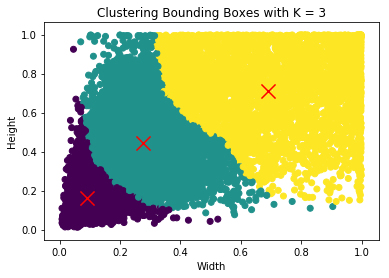

In [55]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [56]:
K = 5
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data)
k_vs_iou_data.append((K,avg_iou))

Iteration 1, AvgError: 0.598401904090807, AvgIou: 0.40159809590919293
Iteration 2, AvgError: 0.43002209648019085, AvgIou: 0.5699779035198091
Iteration 3, AvgError: 0.42326628247042414, AvgIou: 0.5767337175295759
Iteration 4, AvgError: 0.42115295687007565, AvgIou: 0.5788470431299243
Iteration 5, AvgError: 0.4189556902954015, AvgIou: 0.5810443097045985
Iteration 6, AvgError: 0.4122293260741518, AvgIou: 0.5877706739258481
Iteration 7, AvgError: 0.4096323511203891, AvgIou: 0.5903676488796109
Iteration 8, AvgError: 0.423164188561717, AvgIou: 0.5768358114382829
Iteration 9, AvgError: 0.40616456889445796, AvgIou: 0.593835431105542
Iteration 10, AvgError: 0.4217060281960735, AvgIou: 0.5782939718039265
Iteration 11, AvgError: 0.4213574415573924, AvgIou: 0.5786425584426077
Iteration 12, AvgError: 0.41111426655737365, AvgIou: 0.5888857334426264
Iteration 13, AvgError: 0.40529098596548224, AvgIou: 0.5947090140345177
Iteration 14, AvgError: 0.4174732739942897, AvgIou: 0.5825267260057103
Iteration 1

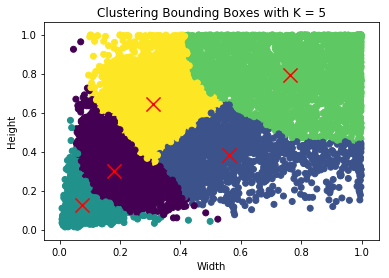

In [57]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [10]:
K = 7
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data)
k_vs_iou_data.append((K,avg_iou))

Iteration 1, AvgError: 0.4699899499250351, AvgIou: 0.5300100500749648
Iteration 2, AvgError: 0.39108803526170616, AvgIou: 0.6089119647382938
Iteration 3, AvgError: 0.38168794262579875, AvgIou: 0.6183120573742013
Iteration 4, AvgError: 0.38516493965382037, AvgIou: 0.6148350603461796
Iteration 5, AvgError: 0.3798005611410567, AvgIou: 0.6201994388589432
Iteration 6, AvgError: 0.37690366427154426, AvgIou: 0.6230963357284559
Iteration 7, AvgError: 0.38739985035236535, AvgIou: 0.6126001496476345
Iteration 8, AvgError: 0.37343423226770883, AvgIou: 0.6265657677322912
Iteration 9, AvgError: 0.36533924365374304, AvgIou: 0.6346607563462568
Iteration 10, AvgError: 0.3857231586502406, AvgIou: 0.6142768413497594
Iteration 11, AvgError: 0.3770800187966301, AvgIou: 0.62291998120337
Iteration 12, AvgError: 0.37605823354411666, AvgIou: 0.6239417664558833
Iteration 13, AvgError: 0.37960757293286884, AvgIou: 0.6203924270671312
Iteration 14, AvgError: 0.38229294714953493, AvgIou: 0.6177070528504649
Iterati

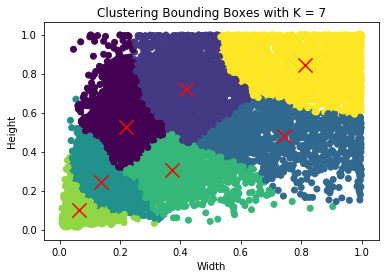

In [11]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [12]:
K = 9
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data)
k_vs_iou_data.append((K,avg_iou))

Iteration 1, AvgError: 0.4387795902483578, AvgIou: 0.5612204097516423
Iteration 2, AvgError: 0.3543844631059386, AvgIou: 0.6456155368940614
Iteration 3, AvgError: 0.36256898516954544, AvgIou: 0.6374310148304546
Iteration 4, AvgError: 0.36048301888010725, AvgIou: 0.6395169811198927
Iteration 5, AvgError: 0.3468073176894848, AvgIou: 0.6531926823105152
Iteration 6, AvgError: 0.3381578489442891, AvgIou: 0.661842151055711
Iteration 7, AvgError: 0.34043294562597937, AvgIou: 0.6595670543740207
Iteration 8, AvgError: 0.34083350270206947, AvgIou: 0.6591664972979305
Iteration 9, AvgError: 0.3389793561029174, AvgIou: 0.6610206438970827
Iteration 10, AvgError: 0.34418176121508887, AvgIou: 0.6558182387849112
Iteration 11, AvgError: 0.3366438966506978, AvgIou: 0.6633561033493021
Iteration 12, AvgError: 0.33161604570573305, AvgIou: 0.6683839542942669
Iteration 13, AvgError: 0.33778026041002557, AvgIou: 0.6622197395899744
Iteration 14, AvgError: 0.34187553269602433, AvgIou: 0.6581244673039758
Iteratio

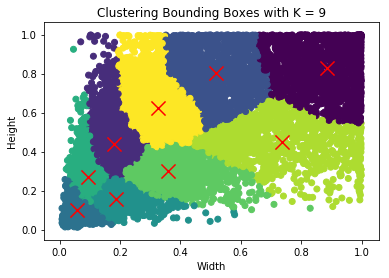

In [13]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [14]:
K = 11
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data)
k_vs_iou_data.append((K,avg_iou))

Iteration 1, AvgError: 0.5451245639189176, AvgIou: 0.4548754360810824
Iteration 2, AvgError: 0.3749453664724384, AvgIou: 0.6250546335275616
Iteration 3, AvgError: 0.3625773979339663, AvgIou: 0.6374226020660338
Iteration 4, AvgError: 0.360969976892185, AvgIou: 0.639030023107815
Iteration 5, AvgError: 0.35015461790399804, AvgIou: 0.649845382096002
Iteration 6, AvgError: 0.3462082330071102, AvgIou: 0.65379176699289
Iteration 7, AvgError: 0.34656540184194023, AvgIou: 0.6534345981580599
Iteration 8, AvgError: 0.3355408811225685, AvgIou: 0.6644591188774316
Iteration 9, AvgError: 0.32929950409649633, AvgIou: 0.6707004959035038
Iteration 10, AvgError: 0.3302086839980656, AvgIou: 0.6697913160019344
Iteration 11, AvgError: 0.3293833553936534, AvgIou: 0.6706166446063464
Iteration 12, AvgError: 0.33701152234418624, AvgIou: 0.6629884776558138
Iteration 13, AvgError: 0.3203435094105492, AvgIou: 0.6796564905894508
Iteration 14, AvgError: 0.33199195901721545, AvgIou: 0.6680080409827847
Iteration 15, A

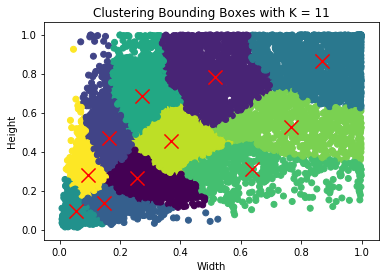

In [15]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [16]:
K = 13
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data)
k_vs_iou_data.append((K,avg_iou))

Iteration 1, AvgError: 0.579611144332141, AvgIou: 0.42038885566785905
Iteration 2, AvgError: 0.35378320890099574, AvgIou: 0.6462167910990041
Iteration 3, AvgError: 0.3380343648860092, AvgIou: 0.6619656351139906
Iteration 4, AvgError: 0.33687187184798867, AvgIou: 0.6631281281520114
Iteration 5, AvgError: 0.33416695329962887, AvgIou: 0.6658330467003711
Iteration 6, AvgError: 0.33893960866539363, AvgIou: 0.6610603913346063
Iteration 7, AvgError: 0.32650106003879165, AvgIou: 0.6734989399612084
Iteration 8, AvgError: 0.32982354962978583, AvgIou: 0.6701764503702142
Iteration 9, AvgError: 0.3340067375807337, AvgIou: 0.6659932624192663
Iteration 10, AvgError: 0.32775548188912235, AvgIou: 0.6722445181108777
Iteration 11, AvgError: 0.32007639088851825, AvgIou: 0.6799236091114819
Iteration 12, AvgError: 0.32822609042543205, AvgIou: 0.671773909574568
Iteration 13, AvgError: 0.3321644107129736, AvgIou: 0.6678355892870265
Iteration 14, AvgError: 0.3201218890801127, AvgIou: 0.6798781109198874
Iterati

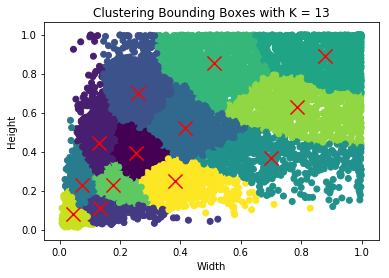

In [17]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [19]:
K = 15
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data)
k_vs_iou_data.append((K,avg_iou))

Iteration 1, AvgError: 0.4039536979735301, AvgIou: 0.5960463020264698
Iteration 2, AvgError: 0.3213812894438742, AvgIou: 0.6786187105561259
Iteration 3, AvgError: 0.30972673076189633, AvgIou: 0.6902732692381037
Iteration 4, AvgError: 0.2970278852338412, AvgIou: 0.7029721147661587
Iteration 5, AvgError: 0.30139534032723636, AvgIou: 0.6986046596727636
Iteration 6, AvgError: 0.2949903570950486, AvgIou: 0.7050096429049513
Iteration 7, AvgError: 0.29923183112722757, AvgIou: 0.7007681688727725
Iteration 8, AvgError: 0.2956846058020155, AvgIou: 0.7043153941979846
Iteration 9, AvgError: 0.2939271853066175, AvgIou: 0.7060728146933823
Iteration 10, AvgError: 0.2984783380140401, AvgIou: 0.7015216619859599
Iteration 11, AvgError: 0.2958351225832288, AvgIou: 0.7041648774167714
Iteration 12, AvgError: 0.3035379271285385, AvgIou: 0.6964620728714616
Iteration 13, AvgError: 0.29451875869358746, AvgIou: 0.7054812413064124
Iteration 14, AvgError: 0.28850817525399414, AvgIou: 0.7114918247460059
Iteration 

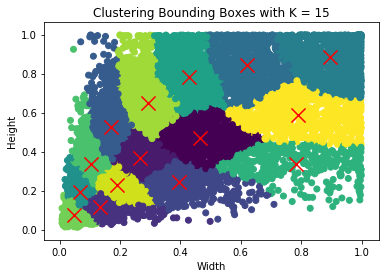

In [20]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [7]:
k_vs_iou_data =[(3, 0.5272683511711749),
 (5, 0.5881793194447844),
 (7, 0.6272229568875494),
 (9, 0.6597511134480362),
 (11, 0.6791186387306813),
 (13, 0.7007609259725441),
 (15, 0.7157899399278393),
 (17, 0.7276327043000521)]
k_vs_iou_data

[(3, 0.5272683511711749),
 (5, 0.5881793194447844),
 (7, 0.6272229568875494),
 (9, 0.6597511134480362),
 (11, 0.6791186387306813),
 (13, 0.7007609259725441),
 (15, 0.7157899399278393),
 (17, 0.7276327043000521)]

In [7]:
K = 17
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data)
k_vs_iou_data.append((K,avg_iou))

Iteration 1, AvgError: 0.4019395557527462, AvgIou: 0.5980604442472538
Iteration 2, AvgError: 0.3245854974333982, AvgIou: 0.6754145025666018
Iteration 3, AvgError: 0.2993582374658967, AvgIou: 0.7006417625341032
Iteration 4, AvgError: 0.29488305747538884, AvgIou: 0.7051169425246112
Iteration 5, AvgError: 0.27917612784009865, AvgIou: 0.7208238721599014
Iteration 6, AvgError: 0.2775213270390601, AvgIou: 0.7224786729609399
Iteration 7, AvgError: 0.26875024575796824, AvgIou: 0.7312497542420318
Iteration 8, AvgError: 0.26571156398782286, AvgIou: 0.7342884360121772
Iteration 9, AvgError: 0.2667933102387349, AvgIou: 0.7332066897612651
Iteration 10, AvgError: 0.2699883471382253, AvgIou: 0.7300116528617747
Iteration 11, AvgError: 0.27185120764454174, AvgIou: 0.7281487923554583
Iteration 12, AvgError: 0.2688538641159002, AvgIou: 0.7311461358840998
Iteration 13, AvgError: 0.27327312804773496, AvgIou: 0.726726871952265
Iteration 14, AvgError: 0.27454402929393784, AvgIou: 0.7254559707060622
Iteration

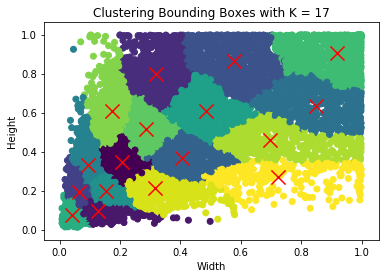

In [8]:
cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [8]:
K = 19
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = pascal_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data)
k_vs_iou_data.append((K,avg_iou))

Iteration 1, AvgError: 0.3960820619810565, AvgIou: 0.6039179380189436
Iteration 2, AvgError: 0.3067899287087372, AvgIou: 0.6932100712912628
Iteration 3, AvgError: 0.30300745777540306, AvgIou: 0.6969925422245971
Iteration 4, AvgError: 0.290828059718863, AvgIou: 0.7091719402811371
Iteration 5, AvgError: 0.30300864230289165, AvgIou: 0.6969913576971085
Iteration 6, AvgError: 0.2927924801464318, AvgIou: 0.7072075198535682
Iteration 7, AvgError: 0.2867083893866582, AvgIou: 0.713291610613342
Iteration 8, AvgError: 0.28084962062220514, AvgIou: 0.7191503793777949
Iteration 9, AvgError: 0.27883187249328567, AvgIou: 0.7211681275067142
Iteration 10, AvgError: 0.2698832431466777, AvgIou: 0.7301167568533222
Iteration 11, AvgError: 0.2772429464158851, AvgIou: 0.7227570535841146
Iteration 12, AvgError: 0.27367163500305486, AvgIou: 0.7263283649969451
Iteration 13, AvgError: 0.2632316295182038, AvgIou: 0.7367683704817963
Iteration 14, AvgError: 0.2674607221743061, AvgIou: 0.732539277825694
Iteration 15,

In [4]:
k_vs_iou_data = [(3, 0.5272683511711749),
 (5, 0.5881793194447844),
 (7, 0.6272229568875494),
 (9, 0.6597511134480362),
 (11, 0.6791186387306813),
 (13, 0.7007609259725441),
 (15, 0.7157899399278393),
 (17, 0.7276327043000521),
 (19, 0.7410641979821389)]

In [12]:
k_vs_iou_data = np.array(k_vs_iou_data)

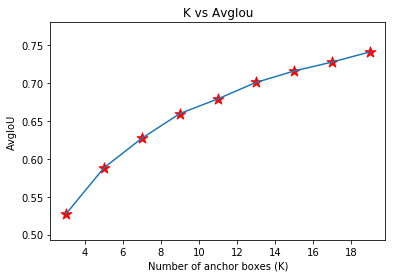

In [27]:
plt.xlabel('Number of anchor boxes (K)')
plt.ylabel('AvgIoU')
plt.title('K vs AvgIou')
plt.scatter(k_vs_iou_data[:,0],k_vs_iou_data[:,1],c='r',marker='*',s=128)
plt.plot(k_vs_iou_data[:,0],k_vs_iou_data[:,1])

In [58]:
from config import Configuration
import pandas as pd
import numpy as np
from util import cvt_coord_to_diagonal, intersection_over_union, cvt_coord_to_mid_point
import matplotlib.pyplot as plt
from k_means import KMeans
from mini_batch_kmeans import MiniBatchKMeans

In [59]:
leaf_train_data = pd.read_csv('annotation_data/train_leaf_data_v2.csv')
leaf_train_data.head(10)

,image_path,label,xmin,ymin,xmax,ymax,xc,yc,w,h
0,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.579291,0.002809,0.850047,0.466643,0.714669,0.234726,0.270756,0.463834
1,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.208256,0.718048,0.333022,1.000000,0.270639,0.859024,0.124767,0.281952
2,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.163013,0.046348,0.268424,0.314607,0.215718,0.180478,0.105410,0.268258
3,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.127799,0.583919,0.230877,0.795646,0.179338,0.689782,0.103078,0.211728
4,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.334188,0.548806,0.460588,0.660463,0.397388,0.604635,0.126399,0.111657
5,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.458489,0.468750,0.521455,0.639045,0.489972,0.553897,0.062966,0.170295
6,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.295243,0.152739,0.401819,0.294593,0.348531,0.223666,0.106576,0.141854
7,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.488806,0.204003,0.614039,0.321980,0.551423,0.262992,0.125233,0.117978
8,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.895289,0.145365,0.988573,0.614817,0.941931,0.380091,0.093284,0.469452
9,.\data\leaf_data_v2\train\leaf_infected_0.jpg,infected,0.000233,0.805478,0.099580,0.936096,0.049907,0.870787,0.099347,0.130618


In [119]:
k_vs_iou_data = []

Iteration 1, AvgError: 0.6000056737045695, AvgIou: 0.39999432629543036
Iteration 2, AvgError: 0.4863860122841395, AvgIou: 0.5136139877158605
Iteration 3, AvgError: 0.4504828535558453, AvgIou: 0.5495171464441547
Iteration 4, AvgError: 0.4319370473788973, AvgIou: 0.5680629526211027
Iteration 5, AvgError: 0.4278650839701709, AvgIou: 0.5721349160298291
Iteration 6, AvgError: 0.4219208235493021, AvgIou: 0.578079176450698
Iteration 7, AvgError: 0.40851581763604106, AvgIou: 0.591484182363959
Iteration 8, AvgError: 0.414203347173731, AvgIou: 0.5857966528262692
Iteration 9, AvgError: 0.4122495925130324, AvgIou: 0.5877504074869676
Iteration 10, AvgError: 0.40733299893046626, AvgIou: 0.5926670010695337
Iteration 11, AvgError: 0.4116581964313644, AvgIou: 0.5883418035686356
Iteration 12, AvgError: 0.4022296582912799, AvgIou: 0.5977703417087201
Iteration 13, AvgError: 0.40619684014683355, AvgIou: 0.5938031598531666
Iteration 14, AvgError: 0.4019645542222669, AvgIou: 0.5980354457777332
Iteration 15, 

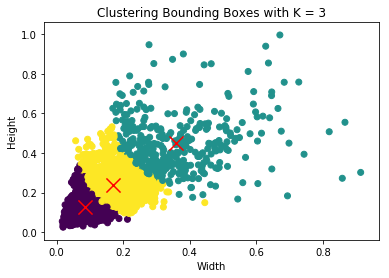

In [105]:
K = 3
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

Iteration 1, AvgError: 0.7887898598077031, AvgIou: 0.211210140192297
Iteration 2, AvgError: 0.4310681196229445, AvgIou: 0.5689318803770554
Iteration 3, AvgError: 0.3625688248456149, AvgIou: 0.6374311751543851
Iteration 4, AvgError: 0.353451681891026, AvgIou: 0.6465483181089741
Iteration 5, AvgError: 0.3543438641325024, AvgIou: 0.6456561358674976
Iteration 6, AvgError: 0.3554896659719033, AvgIou: 0.6445103340280968
Iteration 7, AvgError: 0.3507266744034153, AvgIou: 0.6492733255965848
Iteration 8, AvgError: 0.3500621789851699, AvgIou: 0.64993782101483
Iteration 9, AvgError: 0.35472948926045594, AvgIou: 0.6452705107395442
Iteration 10, AvgError: 0.34556636289217685, AvgIou: 0.6544336371078232
Iteration 11, AvgError: 0.3498770460283833, AvgIou: 0.6501229539716167
Iteration 12, AvgError: 0.3502295290793324, AvgIou: 0.6497704709206676
Iteration 13, AvgError: 0.3579488285564235, AvgIou: 0.6420511714435766
Iteration 14, AvgError: 0.3428318985581408, AvgIou: 0.6571681014418591
Iteration 15, Avg

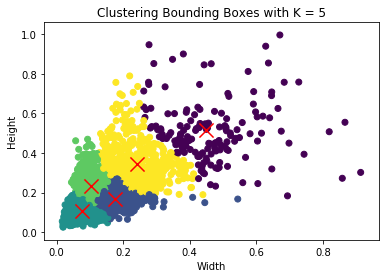

In [123]:
K = 5
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

Iteration 1, AvgError: 0.6838317045575424, AvgIou: 0.3161682954424575
Iteration 2, AvgError: 0.4966059042879612, AvgIou: 0.5033940957120387
Iteration 3, AvgError: 0.4594205246920901, AvgIou: 0.5405794753079098
Iteration 4, AvgError: 0.4299798936607198, AvgIou: 0.5700201063392801
Iteration 5, AvgError: 0.4027460642979596, AvgIou: 0.5972539357020404
Iteration 6, AvgError: 0.39878821085426536, AvgIou: 0.6012117891457348
Iteration 7, AvgError: 0.38696030838015405, AvgIou: 0.613039691619846
Iteration 8, AvgError: 0.38585341984776156, AvgIou: 0.6141465801522383
Iteration 9, AvgError: 0.37471255348853993, AvgIou: 0.6252874465114601
Iteration 10, AvgError: 0.36384442438542625, AvgIou: 0.6361555756145739
Iteration 11, AvgError: 0.36047454656015243, AvgIou: 0.6395254534398478
Iteration 12, AvgError: 0.35287520538280204, AvgIou: 0.6471247946171979
Iteration 13, AvgError: 0.3566037471375589, AvgIou: 0.6433962528624411
Iteration 14, AvgError: 0.3443235859116917, AvgIou: 0.6556764140883083
Iteration

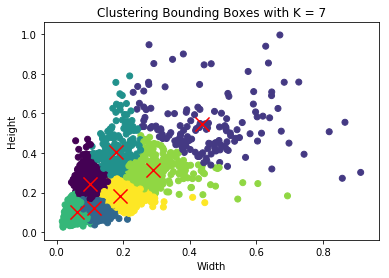

In [107]:
K = 7
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [126]:
k_means.cluster_vectors.reshape(-1)

array([0.44752974, 0.51667883, 0.17638203, 0.16553482, 0.076274  ,
       0.10540195, 0.10295663, 0.23137522, 0.24225889, 0.3452266 ])

In [128]:
k_means.cluster_vectors

array([[0.44752974, 0.51667883],
       [0.17638203, 0.16553482],
       [0.076274  , 0.10540195],
       [0.10295663, 0.23137522],
       [0.24225889, 0.3452266 ]])

Iteration 1, AvgError: 0.8150250784681431, AvgIou: 0.18497492153185682
Iteration 2, AvgError: 0.37034428060072333, AvgIou: 0.6296557193992767
Iteration 3, AvgError: 0.350963717869043, AvgIou: 0.6490362821309571
Iteration 4, AvgError: 0.35352088896347417, AvgIou: 0.6464791110365258
Iteration 5, AvgError: 0.3478551115141247, AvgIou: 0.6521448884858753
Iteration 6, AvgError: 0.3300006571568827, AvgIou: 0.6699993428431174
Iteration 7, AvgError: 0.3257962897164583, AvgIou: 0.6742037102835418
Iteration 8, AvgError: 0.31635248627273926, AvgIou: 0.6836475137272606
Iteration 9, AvgError: 0.3187488141319079, AvgIou: 0.6812511858680922
Iteration 10, AvgError: 0.31307440743060505, AvgIou: 0.686925592569395
Iteration 11, AvgError: 0.3085746371191196, AvgIou: 0.6914253628808804
Iteration 12, AvgError: 0.3128411687688333, AvgIou: 0.6871588312311667
Iteration 13, AvgError: 0.3044731323328624, AvgIou: 0.6955268676671376
Iteration 14, AvgError: 0.30936011715556366, AvgIou: 0.6906398828444363
Iteration 1

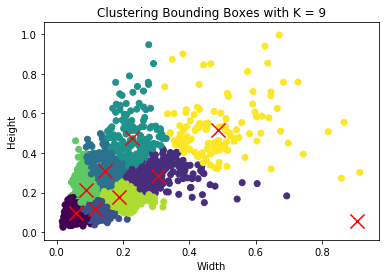

In [108]:
K = 9
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

Iteration 1, AvgError: 0.7507180263941914, AvgIou: 0.2492819736058085
Iteration 2, AvgError: 0.4180327240114095, AvgIou: 0.5819672759885904
Iteration 3, AvgError: 0.4033500191903743, AvgIou: 0.5966499808096257
Iteration 4, AvgError: 0.3777655055623297, AvgIou: 0.6222344944376703
Iteration 5, AvgError: 0.35804804272655916, AvgIou: 0.6419519572734409
Iteration 6, AvgError: 0.33686014213171434, AvgIou: 0.6631398578682857
Iteration 7, AvgError: 0.3219333293048144, AvgIou: 0.6780666706951857
Iteration 8, AvgError: 0.33090579671913406, AvgIou: 0.6690942032808661
Iteration 9, AvgError: 0.31574692486374956, AvgIou: 0.6842530751362504
Iteration 10, AvgError: 0.3045959045155219, AvgIou: 0.6954040954844782
Iteration 11, AvgError: 0.30733836336531806, AvgIou: 0.6926616366346819
Iteration 12, AvgError: 0.3028181681304703, AvgIou: 0.6971818318695296
Iteration 13, AvgError: 0.29641419612599496, AvgIou: 0.703585803874005
Iteration 14, AvgError: 0.29658830775826955, AvgIou: 0.7034116922417303
Iteration

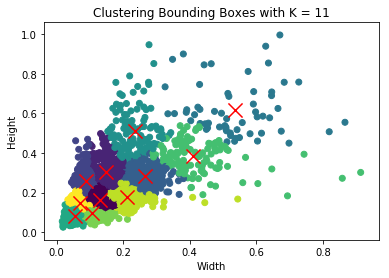

In [109]:
K = 11
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

In [117]:
k_vs_iou_data

array([[ 3.        ,  0.60161551],
       [ 5.        ,  0.6629281 ],
       [ 7.        ,  0.69978581],
       [ 9.        ,  0.71299751],
       [11.        ,  0.746564  ],
       [13.        ,  0.75129917],
       [15.        ,  0.77260912],
       [17.        ,  0.77799703]])

Iteration 1, AvgError: 0.37545139371257036, AvgIou: 0.6245486062874297
Iteration 2, AvgError: 0.3099027553527497, AvgIou: 0.6900972446472506
Iteration 3, AvgError: 0.297069203943498, AvgIou: 0.7029307960565021
Iteration 4, AvgError: 0.29146335192276174, AvgIou: 0.7085366480772385
Iteration 5, AvgError: 0.29613992107421494, AvgIou: 0.7038600789257851
Iteration 6, AvgError: 0.29172137249351193, AvgIou: 0.7082786275064881
Iteration 7, AvgError: 0.2912836591061662, AvgIou: 0.7087163408938338
Iteration 8, AvgError: 0.28137088040332475, AvgIou: 0.7186291195966752
Iteration 9, AvgError: 0.2915138978911352, AvgIou: 0.7084861021088648
Iteration 10, AvgError: 0.2848361165896117, AvgIou: 0.7151638834103883
Iteration 11, AvgError: 0.2792047288369467, AvgIou: 0.7207952711630533
Iteration 12, AvgError: 0.2772369999034762, AvgIou: 0.7227630000965239
Iteration 13, AvgError: 0.27630272497298297, AvgIou: 0.7236972750270172
Iteration 14, AvgError: 0.2774622713308653, AvgIou: 0.7225377286691347
Iteration 

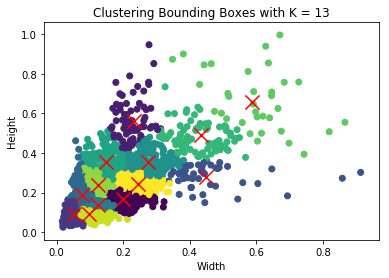

In [111]:
K = 13
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

Iteration 1, AvgError: 0.44204921157728827, AvgIou: 0.5579507884227116
Iteration 2, AvgError: 0.37327859346593173, AvgIou: 0.6267214065340683
Iteration 3, AvgError: 0.36264128804711265, AvgIou: 0.6373587119528871
Iteration 4, AvgError: 0.34534579041497715, AvgIou: 0.654654209585023
Iteration 5, AvgError: 0.33346716943791604, AvgIou: 0.666532830562084
Iteration 6, AvgError: 0.31386089881377277, AvgIou: 0.6861391011862275
Iteration 7, AvgError: 0.31098623265715, AvgIou: 0.68901376734285
Iteration 8, AvgError: 0.3125224424665528, AvgIou: 0.6874775575334472
Iteration 9, AvgError: 0.3040733667068413, AvgIou: 0.6959266332931586
Iteration 10, AvgError: 0.3032314533422753, AvgIou: 0.6967685466577245
Iteration 11, AvgError: 0.2989792140653471, AvgIou: 0.701020785934653
Iteration 12, AvgError: 0.30443029663380955, AvgIou: 0.6955697033661904
Iteration 13, AvgError: 0.2921181911167626, AvgIou: 0.7078818088832375
Iteration 14, AvgError: 0.2832307500421412, AvgIou: 0.7167692499578588
Iteration 15, A

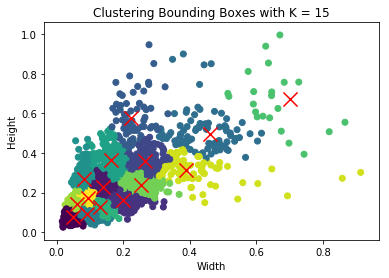

In [112]:
K = 15
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

Iteration 1, AvgError: 0.6442386122492589, AvgIou: 0.355761387750741
Iteration 2, AvgError: 0.348081376158813, AvgIou: 0.6519186238411869
Iteration 3, AvgError: 0.3183046119286715, AvgIou: 0.6816953880713286
Iteration 4, AvgError: 0.3008586601483744, AvgIou: 0.6991413398516256
Iteration 5, AvgError: 0.29112093779169196, AvgIou: 0.708879062208308
Iteration 6, AvgError: 0.286105113857508, AvgIou: 0.713894886142492
Iteration 7, AvgError: 0.2790983183276018, AvgIou: 0.7209016816723982
Iteration 8, AvgError: 0.27523025721112154, AvgIou: 0.7247697427888785
Iteration 9, AvgError: 0.2695262441259274, AvgIou: 0.7304737558740725
Iteration 10, AvgError: 0.2675925759314741, AvgIou: 0.732407424068526
Iteration 11, AvgError: 0.2653888466481147, AvgIou: 0.7346111533518854
Iteration 12, AvgError: 0.2593597988268906, AvgIou: 0.7406402011731094
Iteration 13, AvgError: 0.2572553024465655, AvgIou: 0.7427446975534344
Iteration 14, AvgError: 0.2609090291006556, AvgIou: 0.7390909708993444
Iteration 15, AvgEr

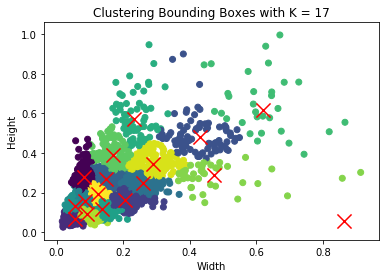

In [122]:
K = 17
ERROR_THRESH = 1e-7
MAX_ITER = 1000
SAMPLE_SIZE = 1000

df = leaf_train_data[['w','h']]
train_data = np.array(df)

k_means = MiniBatchKMeans(K,max_iteration=MAX_ITER,mini_batch_size=SAMPLE_SIZE)
avg_error,avg_iou = k_means.train(train_data)
k_vs_iou_data.append((K,avg_iou))

cluster_vectors = k_means.cluster_vectors
cluster_labels = k_means.fit(train_data)
plt.title('Clustering Bounding Boxes with K = %d'% K,)
plt.xlabel('Width')
plt.ylabel('Height')
plt.scatter(train_data[:,0],train_data[:,1],c=cluster_labels)
plt.scatter(cluster_vectors[:,0],cluster_vectors[:,1],marker='x',c='red',s=200)

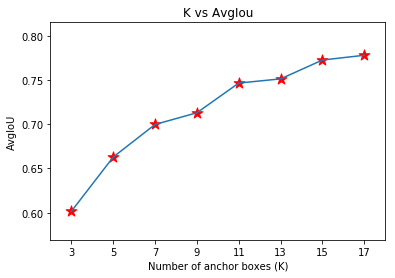

In [114]:
k_vs_iou_data = np.array(k_vs_iou_data)
plt.xlabel('Number of anchor boxes (K)')
plt.ylabel('AvgIoU')
plt.xticks(ticks=k_vs_iou_data[:,0])
plt.title('K vs AvgIou')
plt.scatter(k_vs_iou_data[:,0],k_vs_iou_data[:,1],c='r',marker='*',s=128)
plt.plot(k_vs_iou_data[:,0],k_vs_iou_data[:,1])

In [115]:
k_vs_iou_data

array([[ 3.        ,  0.60161551],
       [ 5.        ,  0.6629281 ],
       [ 7.        ,  0.69978581],
       [ 9.        ,  0.71299751],
       [11.        ,  0.746564  ],
       [13.        ,  0.75129917],
       [15.        ,  0.77260912],
       [17.        ,  0.77799703]])